# Exploratory Data Analysis
---

***Para facilitar la lectura y seguimiento de este archivo, las llamadas a los endpoints (y algunas pasos de conversión de datos y separación de columnas), están desarrollados en endpoints.py, que es utilizado a modo de librería de funciones***

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from endpoints import *
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## 1. Obtenemos las ids de las monedas a utilizar, llamando el endpoint que lista a la totalidad
---

https://api.coingecko.com/api/v3/coins/list

La moneda bitcoin será utilizada para algunas comparaciones, a modo de patrón.

In [2]:
# Llamado al endpoint
df_monedas = get_coins_list()

# Listado de monedas seleccionadas
crypto_names = [
    "Bitcoin",
    "Monero",
    "Zcash",
    "Dash",
    "Horizen",
    "Verge",
    "Grin",
    "Pirate Chain",
    "Decred",
    "Dero",
    "Secret"
]

try:
    # Filtramos
    df_monedas = df_monedas[df_monedas['name'].isin(crypto_names)]

    # Listamos las IDs
    crypto_ids = df_monedas['id'].tolist()
except:
    print(df_monedas)

In [3]:
crypto_ids

['bitcoin',
 'dash',
 'decred',
 'dero',
 'grin',
 'monero',
 'pirate-chain',
 'secret',
 'verge',
 'zcash',
 'zencash']

### Dada la utilización de los ids para el llamado a los endpoints, y el orden de los registros brindados por CoinGecko, no vamos a observar filas duplicadas a lo largo de este análisis.

## 2. El endpoint "Markets" provee información general de las monedas seleccionadas
---

https://api.coingecko.com/api/v3/coins/markets?vs_currency=USD&ids={}&order=market_cap_desc&per_page=100&page=1&sparkline=false&locale=en

In [4]:
# Configuramos para expandir los df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Llamamos el Markets endpoint con el listado de monedas seleccionadas 

In [5]:
df_markets = get_coins_markets(crypto_ids)

In [6]:
df_markets

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29281.000000,569646122666,1,6.147801e+11,10870545770,29504.000000,29246.000000,-222.762754,-0.75503,-4.477409e+09,-0.77987,1.945829e+07,2.100000e+07,21000000.0,69045.000000,-57.59962,2021-11-10 14:24:11.849,67.810000,43073.09675,2013-07-06 00:00:00.000,NaN,2023-08-15 17:48:15.417
1,monero,xmr,Monero,https://assets.coingecko.com/coins/images/69/l...,157.160000,2853718602,26,NaN,69137872,159.190000,156.840000,-1.922581,-1.20858,-3.581645e+07,-1.23952,1.814782e+07,NaN,NaN,542.330000,-71.00470,2018-01-09 00:00:00.000,0.216177,72640.91628,2015-01-14 00:00:00.000,NaN,2023-08-15 17:48:14.796
2,dash,dash,Dash,https://assets.coingecko.com/coins/images/19/l...,31.300000,357140384,106,5.922094e+08,28122754,32.090000,31.210000,-0.788192,-2.45646,-9.149511e+06,-2.49789,1.140998e+07,1.892000e+07,NaN,1493.590000,-97.90443,2017-12-20 00:00:00.000,0.213899,14532.72537,2014-02-14 00:00:00.000,NaN,2023-08-15 17:48:14.034
3,zcash,zec,Zcash,https://assets.coingecko.com/coins/images/486/...,29.390000,242992863,143,6.171847e+08,20729107,29.710000,29.140000,-0.319134,-1.07417,-2.813697e+06,-1.14468,8.267946e+06,2.100000e+07,21000000.0,3191.930000,-99.07937,2016-10-29 00:00:00.000,19.750000,48.76089,2020-03-13 02:20:55.002,NaN,2023-08-15 17:48:12.480
4,decred,dcr,Decred,https://assets.coingecko.com/coins/images/329/...,14.330000,220824154,153,3.008675e+08,632343,14.760000,14.320000,-0.389696,-2.64716,-6.106131e+06,-2.69075,1.541312e+07,2.100000e+07,NaN,247.350000,-94.20785,2021-04-17 00:41:14.790,0.431540,3219.96049,2016-12-26 00:00:00.000,NaN,2023-08-15 17:48:00.641
5,zencash,zen,Horizen,https://assets.coingecko.com/coins/images/691/...,8.320000,116749352,234,1.749327e+08,6075551,8.800000,8.310000,-0.405102,-4.64185,-5.830298e+06,-4.75633,1.401531e+07,1.401533e+07,21000000.0,165.920000,-94.97752,2021-05-08 06:00:30.087,3.260000,155.26576,2019-10-17 00:00:00.000,NaN,2023-08-15 17:48:03.279
6,secret,scrt,Secret,https://assets.coingecko.com/coins/images/1187...,0.386009,80856163,294,NaN,8405858,0.391274,0.326409,0.056928,17.29899,1.135254e+07,16.33373,2.110783e+08,1.901982e+08,NaN,10.380000,-96.28839,2021-10-28 12:44:49.785,0.255219,51.02464,2020-11-03 06:12:33.048,NaN,2023-08-15 17:48:04.860
7,verge,xvg,Verge,https://assets.coingecko.com/coins/images/203/...,0.003951,65266887,348,6.540183e+07,5948093,0.004276,0.003933,-0.000319,-7.47149,-5.398709e+06,-7.63980,1.652084e+10,1.655500e+10,NaN,0.261874,-98.49161,2017-12-24 00:00:00.000,0.000002,176669.55129,2015-02-06 00:00:00.000,NaN,2023-08-15 17:48:13.620
8,pirate-chain,arrr,Pirate Chain,https://assets.coingecko.com/coins/images/6905...,0.235085,45923625,434,4.680978e+07,33913,0.239468,0.234083,-0.003418,-1.43291,-8.805459e+05,-1.88134,1.962138e+08,2.000000e+08,NaN,16.760000,-98.60358,2021-04-23 18:13:27.423,0.007978,2833.72945,2020-11-26 02:10:52.806,NaN,2023-08-15 17:47:52.861
9,dero,dero,Dero,https://assets.coingecko.com/coins/images/3522...,3.490000,44229612,445,7.326624e+07,21415,3.550000,3.410000,-0.049934,-1.41120,-7.228046e+05,-1.60793,1.267735e+07,1.840000e+07,20999999.0,27.290000,-87.21786,2021-10-10 06:37:31.666,0.248577,1303.53678,2020-03-13 02:22:55.215,NaN,2023-08-15 17:47:42.681


El dataframe no presenta mayores problemas. Hay algunos valores no disponibilizados por CoinGecko. Analizaremos más tarde cuáles de estos necesitaremos y qué fuentes usar para obtenerlos. La dispersión de los valores está dentro de la esperada para activos tan diversos.

Eliminamos image y roi (el ROI no puede medirse sin referencia a la ventana de tiempo, etc; por lo que retorna NA)

In [7]:
df_markets.drop(columns=['image', 'roi'], inplace= True)

In [8]:
df_markets

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,29281.000000,569646122666,1,6.147801e+11,10870545770,29504.000000,29246.000000,-222.762754,-0.75503,-4.477409e+09,-0.77987,1.945829e+07,2.100000e+07,21000000.0,69045.000000,-57.59962,2021-11-10 14:24:11.849,67.810000,43073.09675,2013-07-06 00:00:00.000,2023-08-15 17:48:15.417
1,monero,xmr,Monero,157.160000,2853718602,26,NaN,69137872,159.190000,156.840000,-1.922581,-1.20858,-3.581645e+07,-1.23952,1.814782e+07,NaN,NaN,542.330000,-71.00470,2018-01-09 00:00:00.000,0.216177,72640.91628,2015-01-14 00:00:00.000,2023-08-15 17:48:14.796
2,dash,dash,Dash,31.300000,357140384,106,5.922094e+08,28122754,32.090000,31.210000,-0.788192,-2.45646,-9.149511e+06,-2.49789,1.140998e+07,1.892000e+07,NaN,1493.590000,-97.90443,2017-12-20 00:00:00.000,0.213899,14532.72537,2014-02-14 00:00:00.000,2023-08-15 17:48:14.034
3,zcash,zec,Zcash,29.390000,242992863,143,6.171847e+08,20729107,29.710000,29.140000,-0.319134,-1.07417,-2.813697e+06,-1.14468,8.267946e+06,2.100000e+07,21000000.0,3191.930000,-99.07937,2016-10-29 00:00:00.000,19.750000,48.76089,2020-03-13 02:20:55.002,2023-08-15 17:48:12.480
4,decred,dcr,Decred,14.330000,220824154,153,3.008675e+08,632343,14.760000,14.320000,-0.389696,-2.64716,-6.106131e+06,-2.69075,1.541312e+07,2.100000e+07,NaN,247.350000,-94.20785,2021-04-17 00:41:14.790,0.431540,3219.96049,2016-12-26 00:00:00.000,2023-08-15 17:48:00.641
5,zencash,zen,Horizen,8.320000,116749352,234,1.749327e+08,6075551,8.800000,8.310000,-0.405102,-4.64185,-5.830298e+06,-4.75633,1.401531e+07,1.401533e+07,21000000.0,165.920000,-94.97752,2021-05-08 06:00:30.087,3.260000,155.26576,2019-10-17 00:00:00.000,2023-08-15 17:48:03.279
6,secret,scrt,Secret,0.386009,80856163,294,NaN,8405858,0.391274,0.326409,0.056928,17.29899,1.135254e+07,16.33373,2.110783e+08,1.901982e+08,NaN,10.380000,-96.28839,2021-10-28 12:44:49.785,0.255219,51.02464,2020-11-03 06:12:33.048,2023-08-15 17:48:04.860
7,verge,xvg,Verge,0.003951,65266887,348,6.540183e+07,5948093,0.004276,0.003933,-0.000319,-7.47149,-5.398709e+06,-7.63980,1.652084e+10,1.655500e+10,NaN,0.261874,-98.49161,2017-12-24 00:00:00.000,0.000002,176669.55129,2015-02-06 00:00:00.000,2023-08-15 17:48:13.620
8,pirate-chain,arrr,Pirate Chain,0.235085,45923625,434,4.680978e+07,33913,0.239468,0.234083,-0.003418,-1.43291,-8.805459e+05,-1.88134,1.962138e+08,2.000000e+08,NaN,16.760000,-98.60358,2021-04-23 18:13:27.423,0.007978,2833.72945,2020-11-26 02:10:52.806,2023-08-15 17:47:52.861
9,dero,dero,Dero,3.490000,44229612,445,7.326624e+07,21415,3.550000,3.410000,-0.049934,-1.41120,-7.228046e+05,-1.60793,1.267735e+07,1.840000e+07,20999999.0,27.290000,-87.21786,2021-10-10 06:37:31.666,0.248577,1303.53678,2020-03-13 02:22:55.215,2023-08-15 17:47:42.681


Observamos algunas estadísticas descriptivas con Pandas

In [9]:
df_markets.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,11.000000,1.100000e+01,11.000000,8.000000e+00,1.100000e+01,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,9.000000e+00,4.00,11.000000,11.000000,11.000000,11.00000
mean,2684.150085,5.215264e+10,305.818182,7.708135e+10,1.000931e+09,2704.797611,2680.893104,-20.598740,-0.991965,-4.120919e+08,-1.115027,1.561054e+09,1.895504e+09,20999999.75,6818.405625,-90.487387,8.383673,28596.45122
std,8821.295326,1.716351e+11,326.814265,2.172632e+11,3.273445e+09,8888.410132,8810.767036,67.052663,6.420297,1.348361e+09,6.133358,4.962235e+09,5.497841e+09,0.50,20660.799773,13.742379,20.557594,54387.61358
min,0.003951,5.167932e+06,1.000000,4.680978e+07,2.141500e+04,0.004276,0.003933,-222.762754,-7.471490,-4.477409e+09,-7.639800,8.267946e+06,1.401533e+07,20999999.00,0.261874,-99.986330,0.000002,32.39572
25%,0.310547,5.559526e+07,124.500000,7.130014e+07,6.097855e+05,0.315371,0.280246,-0.596647,-3.644505,-7.627821e+06,-3.525835,1.334633e+07,1.892000e+07,20999999.75,22.025000,-98.547595,0.120458,103.14520
50%,8.320000,1.167494e+08,234.000000,2.379001e+08,6.075551e+06,8.800000,8.310000,-0.319134,-1.432910,-5.398709e+06,-1.881340,1.814782e+07,2.100000e+07,21000000.00,247.350000,-96.288390,0.248577,2833.72945
75%,30.345000,3.000666e+08,391.000000,5.984533e+08,2.442593e+07,30.900000,30.175000,-0.002675,-1.141375,-8.016753e+05,-1.192100,1.701400e+08,1.901982e+08,21000000.00,1017.960000,-90.712855,1.845770,28802.91106
max,29281.000000,5.696461e+11,1180.000000,6.147801e+11,1.087055e+10,29504.000000,29246.000000,0.056928,17.298990,1.135254e+07,16.333730,1.652084e+10,1.655500e+10,21000000.00,69045.000000,-57.599620,67.810000,176669.55129


Los precios de las diferentes monedas son muy diversos, y no son comparables entre sí; lo cual haría gráficos comparativos poco representativos (de hecho probé boxplot y violin, y no aportaban mucho por la gran dispersión). Sí podemos explorar algunas métricas más generales. Por ejemplo, la matriz de correlación:

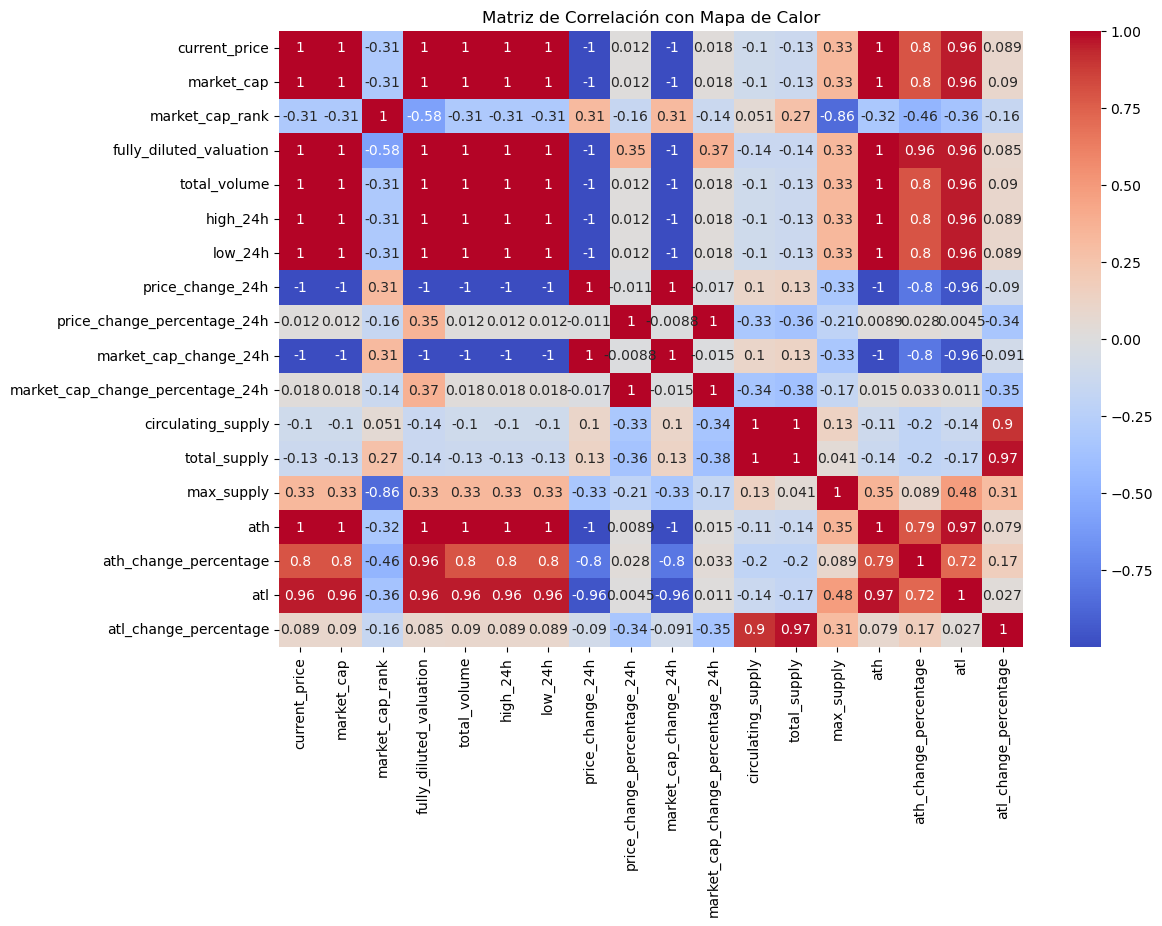

In [10]:
correlation_matrix = df_markets.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Las columnas que indican precios recientes tienen fuerte correlación entre sí. Hay también grupos de columnas relacionadas, por ejemplo (atl, ath, atl_change_percentage, ath_change_percentage) que existen para efectuar una comparación respecto al precio actual.

Respecto a este grupo nombrado (at - All Times), y comparando máximos y mínimos de todos los tiempos con el precio actual, notamos que **volatilidad de las monedas es muy notoria**. Si bien los valores actuales respecto a los máximos son entre un ~57 y un ~100% menores, tenemos aún mayor variedad de diferencias del precio actual respecto a los mínimos históricos. 

En otro grupo de columnas relacionadas entre sí, observé valores de las columnas que detallan supply (cantidad de unidades de la moneda) y noté varios valores faltantes. Busqué datos adicionales en CoinMarketCap:

In [11]:
metadata = get_metadata_v2(crypto_ids)

In [12]:
metadata

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,tag-names,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags,self_reported_market_cap,infinite_supply
0,1,Bitcoin,BTC,coin,Bitcoin (BTC) is a cryptocurrency launched in ...,bitcoin,https://s2.coinmarketcap.com/static/img/coins/...,bitcoin,,"[mineable, pow, sha-256, store-of-value, state...","[Mineable, PoW, SHA-256, Store Of Value, State...","[OTHERS, ALGORITHM, ALGORITHM, CATEGORY, CATEG...","{'website': ['https://bitcoin.org/'], 'twitter...",None,2010-07-13T00:00:00.000Z,,0,2010-07-13T00:00:00.000Z,[],None,None,None,False
1,131,Dash,DASH,coin,Dash (DASH) is a cryptocurrency launched in 20...,dash,https://s2.coinmarketcap.com/static/img/coins/...,dashpay,,"[mineable, hybrid-pow-pos, x11, medium-of-exch...","[Mineable, Hybrid - PoW & PoS, X11, Medium of ...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://www.dash.org/', 'https:/...",None,2014-02-14T00:00:00.000Z,Dashpay,0,2014-01-18T00:00:00.000Z,[],None,None,None,False
2,328,Monero,XMR,coin,Monero (XMR) is a cryptocurrency . Users are a...,monero,https://s2.coinmarketcap.com/static/img/coins/...,monero,,"[mineable, pow, medium-of-exchange, privacy, r...","[Mineable, PoW, Medium of Exchange, Privacy, R...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY, CATEGO...","{'website': ['https://www.getmonero.org/'], 't...","{'id': '5604', 'name': 'Secret', 'slug': 'secr...",2014-05-21T00:00:00.000Z,monero,0,None,[{'contract_address': 'secret19ungtd2c7srftqdw...,None,None,None,True
3,693,Verge,XVG,coin,Verge (XVG) is a cryptocurrency . Users are ab...,verge,https://s2.coinmarketcap.com/static/img/coins/...,vergecurrency,We have received reports from the Verge team t...,"[mineable, multiple-algorithms, medium-of-exch...","[Mineable, Multiple algorithms, Medium of Exch...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY]","{'website': ['http://vergecurrency.com/'], 'tw...",None,2014-10-25T00:00:00.000Z,vergecurrency,0,None,[],None,None,None,False
4,1168,Decred,DCR,coin,Decred (DCR) is a cryptocurrency launched in 2...,decred,https://s2.coinmarketcap.com/static/img/coins/...,decred,,"[mineable, hybrid-pow-pos, blake256, medium-of...","[Mineable, Hybrid - PoW & PoS, BLAKE256, Mediu...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://decred.org/', 'https://p...",None,2016-02-10T00:00:00.000Z,decredproject,0,2016-02-08T00:00:00.000Z,[],None,"[Hybrid - PoW & PoS, BLAKE256, Medium of Excha...",None,False
5,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...","[Mineable, PoW, Equihash, Medium of Exchange, ...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://z.cash/'], 'twitter': ['...","{'id': '1839', 'name': 'BNB', 'slug': 'bnb', '...",2016-10-29T00:00:00.000Z,electriccoinco,0,None,[{'contract_address': '0x1ba42e5193dfa8b03d15d...,None,None,None,False
6,1698,Horizen,ZEN,coin,Horizen (ZEN) is a cryptocurrency launched in ...,horizen,https://s2.coinmarketcap.com/static/img/coins/...,Horizen,,"[mineable, pow, medium-of-exchange, platform, ...","[Mineable, PoW, Medium of Exchange, Platform, ...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY, INDUST...","{'website': ['https://www.horizen.io/', 'https...",None,2017-06-01T00:00:00.000Z,horizenglobal,0,2017-05-31T00:00:00.000Z,[],None,"[DPoS, PoS, PoW, Equihash, Education, Medium o...",None,False
7,2665,Dero,DERO,coin,Dero (DERO) is a cryptocurrency . Users are ab...,dero,https://s2.coinmarketcap.com/static/img/coins/...,DeroProject,,"[mineable, privacy, smart-contracts]","[Mineable, Privacy, Smart Contracts]","[OTHERS, CATEGORY, CATEGORY]","{'website': ['https://dero.io'], 'twitter': ['...",None,2018-04-23T00:00:00.000Z,DeroProject,0,None,[],None,None,None,False
8,3709,Grin,GRIN,coin,Grin (GRIN) is a c

En este dataset también faltan los valores respecto al stock de monedas, no es posible reemplazar. La única novedad que observamos es que, para Monero y Secret, el valor de max_supply no aplica, ya que se indica en estos nuevos datos que, por principio de funcionamiento de estas monedas, es infinito.

## 3. El endpoint coins/{id} nos trae información más específica del estilo metadata.
<hr>

https://api.coingecko.com/api/v3/coins/{id}

Llamamos la función, que utiliza un bucle para llamar al endpoint con cada id que le pasamos en la lista de ids

In [13]:
df_coins = get_coins_id(crypto_ids)

In [14]:
df_coins

,id,symbol,name,asset_platform_id,platforms,detail_platforms,block_time_in_minutes,hashing_algorithm,categories,public_notice,additional_notices,localization,description,links,image,country_origin,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,market_data,community_data,developer_data,public_interest_stats,status_updates,last_updated,tickers,contract_address
0,bitcoin,btc,Bitcoin,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",None,[],"{'en': 'Bitcoin', 'de': 'Bitcoin', 'es': 'Bitc...",{'en': 'Bitcoin is the first successful intern...,"{'homepage': ['http://www.bitcoin.org', '', ''...",{'thumb': 'https://assets.coingecko.com/coins/...,,2009-01-03,75.28,24.72,1328390,1,1,83.151,99.241,83.341,100.011,0.073,"{'current_price': {'aed': 107543, 'ars': 10246...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 35527, 'stars': 70869, 'subscribers'...","{'alexa_rank': 9440, 'bing_matches': None}",[],2023-08-15 17:47:55.279,"[{'base': 'BTC', 'target': 'TUSD', 'market': {...",NaN
1,dash,dash,Dash,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",None,[],"{'en': 'Dash', 'de': 'Dash', 'es': 'Dash', 'fr...",{'en': 'Dash (DASH) is digital cash designed t...,"{'homepage': ['https://www.dash.org', '', ''],...",{'thumb': 'https://assets.coingecko.com/coins/...,,2014-01-19,44.44,55.56,82389,106,39,51.994,65.377,43.398,55.664,0.010,"{'current_price': {'aed': 114.96, 'ars': 10953...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 26, 'stars': 37, 'subscribers': 13, ...","{'alexa_rank': 75926, 'bing_matches': None}",[{'description': 'Release Announcement: Dash P...,2023-08-15 17:48:14.034,"[{'base': 'DASH', 'target': 'USDT', 'market': ...",NaN
2,decred,dcr,Decred,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",None,[],"{'en': 'Decred', 'de': 'Decred', 'es': 'Decred...",{'en': 'Decred aims to build a community-direc...,"{'homepage': ['https://www.decred.org/', 'http...",{'thumb': 'https://assets.coingecko.com/coins/...,,2016-02-08,50.00,50.00,16457,153,67,48.677,77.359,37.138,31.911,0.002,"{'current_price': {'aed': 52.64, 'ars': 5015.6...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 289, 'stars': 701, 'subscribers': 77...","{'alexa_rank': 350460, 'bing_matches': None}","[{'description': 'Decred v1.7.0 ""Based Bison"" ...",2023-08-15 17:48:00.641,"[{'base': 'DCR', 'target': 'EUR', 'market': {'...",NaN
3,dero,dero,Dero,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",None,[],"{'en': 'Dero', 'de': 'Dero', 'es': 'Dero', 'fr...","{'en': 'DERO is a general purpose, private and...","{'homepage': ['https://dero.io/', '', ''], 'bl...",{'thumb': 'https://assets.coingecko.com/coins/...,,2017-12-05,87.50,12.50,9746,445,482,27.963,22.596,30.536,11.724,0.003,"{'current_price': {'aed': 12.81, 'ars': 1220.8...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 15, 'stars': 49, 'subscribers': 17, ...","{'alexa_rank': 1060810, 'bing_matches': None}",[],2023-08-15 17:47:42.681,"[{'base': 'DERO', 'target': 'BTC', 'market': {...",NaN
4,grin,grin,Grin,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",None,[],"{'en': 'Grin', 'de': 'Grin', 'es': 'Grin', 'fr...",{'en': 'Grin coin is a private & lightweight o...,"{'homepage': ['https://grin.mw/', '', ''], 'bl...",{'thumb': 'https://assets.coingecko.com/coins/...,,2019-01-15,NaN,NaN,7965,1180,226,35.921,72.995,6.546,21.440,0.002,"{'current_price': {'aed': 0.1318, 'ars': 12.56...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 1016, '

Este set tiene varios campos de metadata similares a los que observamos con CoinMarketCap en el dataframe del punto anterior. Entre los aspectos más notables de este set, encontramos diversas columnas de rankings y scores, que nos van a ayudar a evaluar la confianza que generan las monedas, y construir eventualmente un KPI alrededor.

Exploramos algunos de los campos con valores anidados

* La columna de categorías

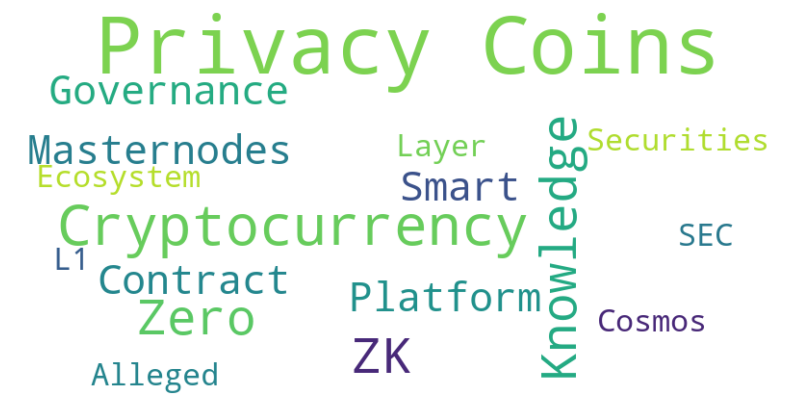

In [15]:
categories_array = np.array(df_coins['categories'].dropna())
flattened_categories = np.concatenate(categories_array)
all_categories = ' '.join(flattened_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* Vamos a observar también la columna tag-names en el dataset de metadata de CoinMarketCap

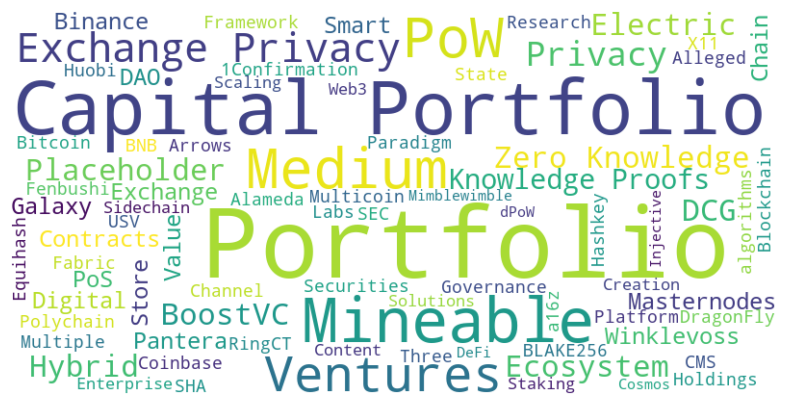

In [16]:
categories_array = np.array(metadata['tag-names'].dropna())
flattened_categories = np.concatenate(categories_array)
all_categories = ' '.join(flattened_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* Las keys de market_data tienen muchas similitudes con las vistas en el endpoint anterior, y algunos datos históricos agregados

In [17]:

df_coins_market = pd.json_normalize(df_coins['market_data'])
df_coins_market


total_value_locked  mcap_to_tvl_ratio fdv_to_tvl_ratio   roi  \
0                  NaN                NaN             None  None   
1                  NaN                NaN             None  None   
2                  NaN                NaN             None  None   
3                  NaN                NaN             None  None   
4                  NaN                NaN             None  None   
5                  NaN                NaN             None  None   
6                  NaN                NaN             None  None   
7                  NaN                7.3                -  None   
8                  NaN                NaN             None  None   
9                  NaN                NaN             None  None   
10                 NaN                NaN             None  None   

    market_cap_rank  price_change_24h  price_change_percentage_24h  \
0                 1       -225.200337                     -0.76330   
1               106         -0.788192                     -2.45646   
2               153         -0.389696                     -2.64716   
3               445         -0.049934                     -1.41120   
4              1180         -0.001936                     -5.11936   
5                26         -1.922581                     -1.20858   
6               434         -0.003418                     -1.43291   
7               294          0.055882                     16.98113   
8               348         -0.000320                     -7.50124   
9               143         -0.320061                     -1.07729   
10              234         -0.404504                     -4.63499   

    price_change_percentage_7d  price_change_percentage_14d  \
0                     -1.52594                      1.29531   
1                     -5.57224                      0.13917   
2                     -1.83840                      0.34889   
3                    -13.76230                    -14.40720   
4                     -5.35635                     14.15125   
5                     -1.32081                     -0.59717   
6                     13.25039                     13.49458   
7                     14.74810                     19.21255   
8                     -7.16520                    -21.29342   
9                     -0.97369                     -1.84666   
10                    -5.47534                    -11.47254   

    price_change_percentage_30d  price_change_percentage_60d  \
0                      -3.64204                     12.90115   
1                      -7.50009                      2.79585   
2                      -3.56850                      1.38510   
3                     -19.73103                    -28.76228   
4                     -12.50784                     12.85064   
5                      -4.43920                     16.71756   
6                      26.81903                     11.19684   
7                      -0.20176                     28.02668   
8                     -34.57020                    174.22495   
9                      -5.66182                     20.03197   
10                      2.26336                     32.85070   

    price_change_percentage_200d  price_change_percentage_1y  \
0                       26.53073                    20.79783   
1                      -38.77829                   -41.91909   
2                      -39.02570                   -56.60355   
3                      -28.41899                   -12.95618   
4                      -46.80008                   -46.06437   
5                      -10.81514                    -5.24669   
6                      -45.22523                   -53.96756   
7                      -51.70936                   -71.66870   
8                       29.46000                    -1.36258   
9                      -36.37709                   -60.55286   
10                     -21.80131                   -58.96558   

    market_cap_change_24h  market_cap_change_percen

* Descripción de la moneda, elegimos en campo en idioma inglés para observar el ejemplo (truncamos por practicidad)

In [18]:
df_coins['description'][0].get('en')[:100]

'Bitcoin is the first successful internet money based on peer-to-peer technology; whereby no central '

* Detalle de plataformas, única entrada con datos. Muestra el contrato actual de la moneda Secret en la blockchain.

In [19]:
df_coins['detail_platforms'][7]

{'secret': {'decimal_place': 6,
  'contract_address': 'secret1k0jntykt7e4g3y88ltc60czgjuqdy4c9e8fzek'}}

* Actividad en GitHub, nos puede contar una historia respecto a la actividad de desarrollo

In [20]:
df_coins['developer_data'][0]

{'forks': 35527,
 'stars': 70869,
 'subscribers': 3946,
 'total_issues': 7545,
 'closed_issues': 7192,
 'pull_requests_merged': 10866,
 'pull_request_contributors': 834,
 'code_additions_deletions_4_weeks': {'additions': 447, 'deletions': -444},
 'commit_count_4_weeks': 199,
 'last_4_weeks_commit_activity_series': []}

Vamos a separar estos datos en un dataframe propio en el siguiente paso.

* La columna tickers nos brinda datos por broker que opera la moneda. Tomamos un solo valor como ejemplo.

In [21]:
df_coins['tickers'][0][0]

{'base': 'BTC',
 'target': 'TUSD',
 'market': {'name': 'Binance',
  'identifier': 'binance',
  'has_trading_incentive': False},
 'last': 29323.03,
 'volume': 55138.45996,
 'converted_last': {'btc': 1.000105, 'eth': 15.92686, 'usd': 29281},
 'converted_volume': {'btc': 55286, 'eth': 880436, 'usd': 1618645957},
 'trust_score': 'green',
 'bid_ask_spread_percentage': 0.014639,
 'timestamp': '2023-08-15T17:47:18+00:00',
 'last_traded_at': '2023-08-15T17:47:18+00:00',
 'last_fetch_at': '2023-08-15T17:47:18+00:00',
 'is_anomaly': False,
 'is_stale': False,
 'trade_url': 'https://www.binance.com/en/trade/BTC_TUSD?ref=37754157',
 'token_info_url': None,
 'coin_id': 'bitcoin',
 'target_coin_id': 'true-usd'}

Esta columna tiene mucha información, vamos a llamar a la API que retorna esta columna por separado en una instancia posterior.

---
***Vamos a re trabajar la API call para descartar algunas columnas, y usar dataframes individuales para otras***

https://api.coingecko.com/api/v3/coins/{}?localization=false&tickers=false&market_data=false&community_data=false

Llamado al endpoint de coins usando la nueva función

In [22]:
df_coins, df_developers = get_coins_id_filtered(crypto_ids)

Ahora tenemos un dataframe limpio con datos por moneda, con relación a su seguridad y confianza

In [23]:
df_coins

,id,symbol,name,block_time_in_minutes,hashing_algorithm,categories,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated
0,bitcoin,btc,Bitcoin,10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",2009-01-03,75.47,24.53,1328391,1,1,83.151,99.241,83.341,100.011,0.073,2023-08-15 17:52:01.550
1,dash,dash,Dash,2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",2014-01-19,44.44,55.56,82389,106,39,51.994,65.377,43.398,55.664,0.010,2023-08-15 17:52:11.749
2,decred,dcr,Decred,5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",2016-02-08,50.00,50.00,16457,153,67,48.677,77.359,37.138,31.911,0.002,2023-08-15 17:52:09.890
3,dero,dero,Dero,0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",2017-12-05,87.50,12.50,9746,445,482,27.963,22.596,30.536,11.724,0.003,2023-08-15 17:51:46.589
4,grin,grin,Grin,1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",2019-01-15,NaN,NaN,7964,1180,226,35.921,72.995,6.546,21.440,0.002,2023-08-15 17:51:46.262
5,monero,xmr,Monero,2,RandomX,[Privacy Coins],2014-04-18,94.12,5.88,114833,26,12,61.097,87.299,51.877,57.940,0.034,2023-08-15 17:52:13.112
6,pirate-chain,arrr,Pirate Chain,1,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2018-08-29,69.23,30.77,18369,434,217,36.358,51.505,33.960,11.999,0.001,2023-08-15 17:51:56.402
7,secret,scrt,Secret,0,None,"[Smart Contract Platform, Privacy Coins, Cosmo...",None,66.67,33.33,58069,294,120,43.613,82.601,10.315,32.111,0.002,2023-08-15 17:52:12.414
8,verge,xvg,Verge,0,Scrypt,[Privacy Coins],2014-10-09,83.33,16.67,42568,348,64,49.214,79.653,43.240,32.093,0.003,2023-08-15 17:52:12.682
9,zcash,zec,Zcash,0,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2016-10-28,91.67,8.33,68636,143,18,56.684,87.898,39.685,53.365,0.004,2023-08-15 17:52:07.740


El hashing algorithm es un importante indicativo de seguridad. El de Secret no está en este dataset, pero una búsqueda en su proyecto de GitHub indica que utiliza X11. Por simplicidad vamos a agregar este dato manualmente (no se encontró disponible en la versión abierta de CoinMarketCap ni Binance como llamada API)

In [24]:
df_coins.loc[df_coins['id'] == 'secret', 'hashing_algorithm'] = 'X11'

In [25]:
df_coins

,id,symbol,name,block_time_in_minutes,hashing_algorithm,categories,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated
0,bitcoin,btc,Bitcoin,10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",2009-01-03,75.47,24.53,1328391,1,1,83.151,99.241,83.341,100.011,0.073,2023-08-15 17:52:01.550
1,dash,dash,Dash,2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",2014-01-19,44.44,55.56,82389,106,39,51.994,65.377,43.398,55.664,0.010,2023-08-15 17:52:11.749
2,decred,dcr,Decred,5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",2016-02-08,50.00,50.00,16457,153,67,48.677,77.359,37.138,31.911,0.002,2023-08-15 17:52:09.890
3,dero,dero,Dero,0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",2017-12-05,87.50,12.50,9746,445,482,27.963,22.596,30.536,11.724,0.003,2023-08-15 17:51:46.589
4,grin,grin,Grin,1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",2019-01-15,NaN,NaN,7964,1180,226,35.921,72.995,6.546,21.440,0.002,2023-08-15 17:51:46.262
5,monero,xmr,Monero,2,RandomX,[Privacy Coins],2014-04-18,94.12,5.88,114833,26,12,61.097,87.299,51.877,57.940,0.034,2023-08-15 17:52:13.112
6,pirate-chain,arrr,Pirate Chain,1,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2018-08-29,69.23,30.77,18369,434,217,36.358,51.505,33.960,11.999,0.001,2023-08-15 17:51:56.402
7,secret,scrt,Secret,0,X11,"[Smart Contract Platform, Privacy Coins, Cosmo...",None,66.67,33.33,58069,294,120,43.613,82.601,10.315,32.111,0.002,2023-08-15 17:52:12.414
8,verge,xvg,Verge,0,Scrypt,[Privacy Coins],2014-10-09,83.33,16.67,42568,348,64,49.214,79.653,43.240,32.093,0.003,2023-08-15 17:52:12.682
9,zcash,zec,Zcash,0,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2016-10-28,91.67,8.33,68636,143,18,56.684,87.898,39.685,53.365,0.004,2023-08-15 17:52:07.740


In [26]:
df_coins.describe()

,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score
count,11.000000,10.00000,10.00000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.090909,76.24300,23.75700,1.610541e+05,305.818182,119.909091,49.342636,72.090909,37.933636,41.211909,0.012182
std,3.015113,18.67996,18.67996,3.886542e+05,326.814265,142.349187,14.774186,20.891684,20.339470,25.445978,0.022360
min,0.000000,44.44000,0.00000,7.964000e+03,1.000000,1.000000,27.963000,22.596000,6.546000,11.724000,0.000000
25%,0.000000,67.31000,9.37250,1.741300e+04,124.500000,28.500000,39.985500,65.926500,32.248000,26.675500,0.002000
50%,1.000000,79.40000,20.60000,4.256800e+04,234.000000,67.000000,48.677000,77.359000,37.234000,32.111000,0.003000
75%,2.000000,90.62750,32.69000,7.551250e+04,391.000000,168.500000,54.339000,84.950000,43.319000,54.514500,0.007000
max,10.000000,100.00000,55.56000,1.328391e+06,1180.000000,482.000000,83.151000,99.241000,83.341000,100.011000,0.073000


El describe nos aporta una idea de la escala de cada medida, fundamental a la hora de compatibilizar uno con otro. Observemos al correlación:

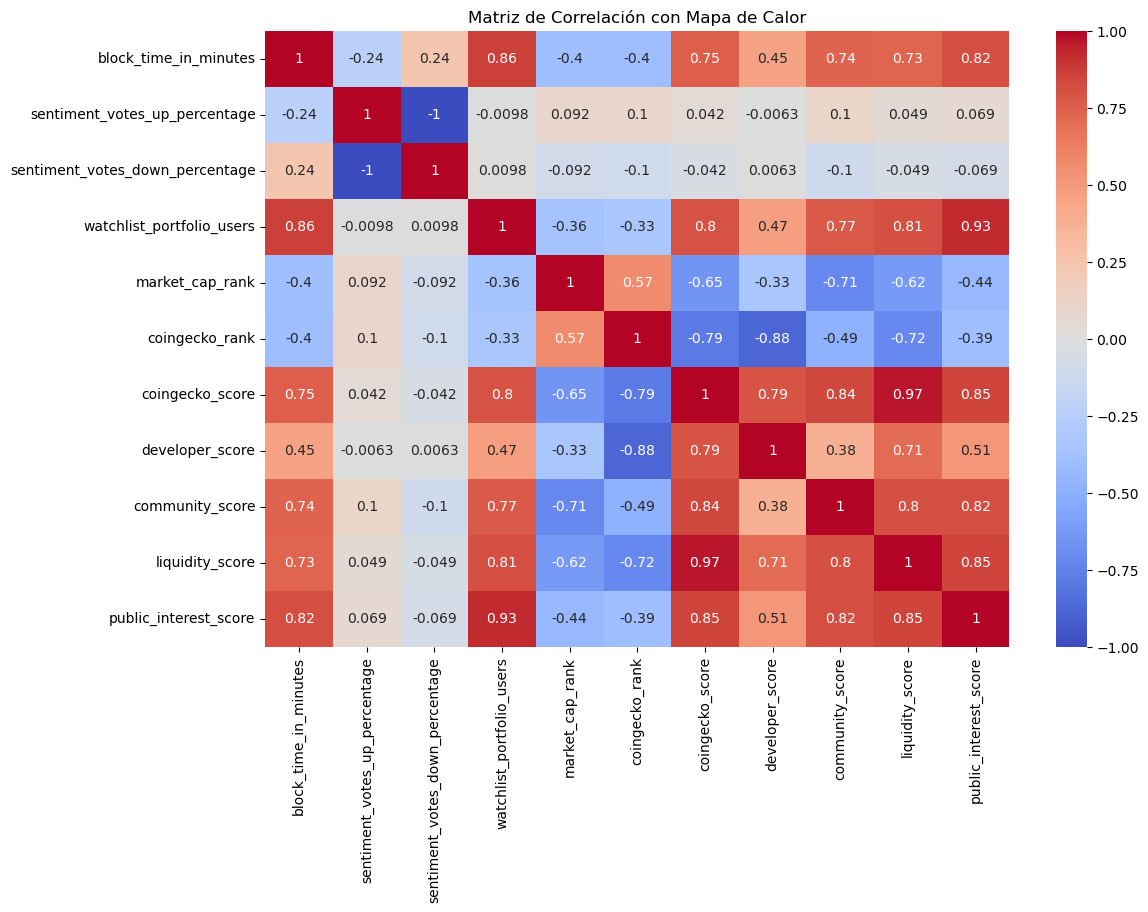

In [27]:
coins_corr = df_coins.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(coins_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Hay columnas que son prácticamente equivalentes, como sentiments_votes_up vs sentiments_vote_down, liquidity_score vs coingecko_score (lo que sugiere que el score de coingecko está fuertemente influenciado por la liquidez); y también public_interest_score vs watchlist_porfolio_users (lo que sugiere que el score se basa fuertemente en la cantidad de usuarios que tienen la moneda en su watchlist).

Para complementarlo, tenemos un dataframe con datos de desarrollo en GitHub

In [28]:
df_developers

,id,symbol,name,forks,stars,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,code_additions_4_weeks,code_deletions_4_weeks,last_4_weeks_commit_activity_sum
0,bitcoin,btc,Bitcoin,35527,70869,3946,7545,7192,10866,834,199,447,-444,0
1,dash,dash,Dash,26,37,13,178,98,931,22,8,44,-34,5
2,decred,dcr,Decred,289,701,77,498,481,2450,64,18,40,-35,6
3,dero,dero,Dero,15,49,17,11,11,0,0,0,0,0,0
4,grin,grin,Grin,1016,5001,400,1355,1234,1987,171,2,285,-390,1
5,monero,xmr,Monero,3520,8029,499,2894,2491,4802,317,0,0,0,0
6,pirate-chain,arrr,Pirate Chain,14,92,20,57,46,21,9,22,309,-182,8
7,secret,scrt,Secret,160,485,48,573,547,680,49,137,4019,-1952,100
8,verge,xvg,Verge,402,1389,276,733,733,265,65,2,446,-444,2
9,zcash,zec,Zcash,2041,4766,380,3769,2810,1787,100,0,0,0,66


In [29]:
df_developers.describe()

,forks,stars,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,code_additions_4_weeks,code_deletions_4_weeks,last_4_weeks_commit_activity_sum
count,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,3915.363636,8319.727273,519.00000,1609.181818,1429.000000,2184.727273,150.818182,35.545455,510.181818,-319.181818,17.090909
std,10542.298481,20918.619123,1150.98662,2324.132949,2144.104149,3212.922473,244.366454,67.350373,1177.653244,572.051889,33.575153
min,14.000000,37.000000,13.00000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,-1952.000000,0.000000
25%,42.500000,95.500000,26.50000,133.000000,87.000000,254.000000,25.000000,1.000000,11.000000,-417.000000,0.000000
50%,289.000000,701.000000,77.00000,573.000000,547.000000,931.000000,64.000000,3.000000,44.000000,-35.000000,2.000000
75%,1528.500000,4883.500000,390.00000,2124.500000,1862.500000,2218.500000,135.500000,20.000000,377.500000,-15.000000,7.000000
max,35527.000000,70869.000000,3946.00000,7545.000000,7192.000000,10866.000000,834.000000,199.000000,4019.000000,0.000000,100.000000


Acá se nota la dispersión de datos dentro de una misma columna. Muy difíciles de graficar por cuestiones de escala, pero vamos a observar correlación:

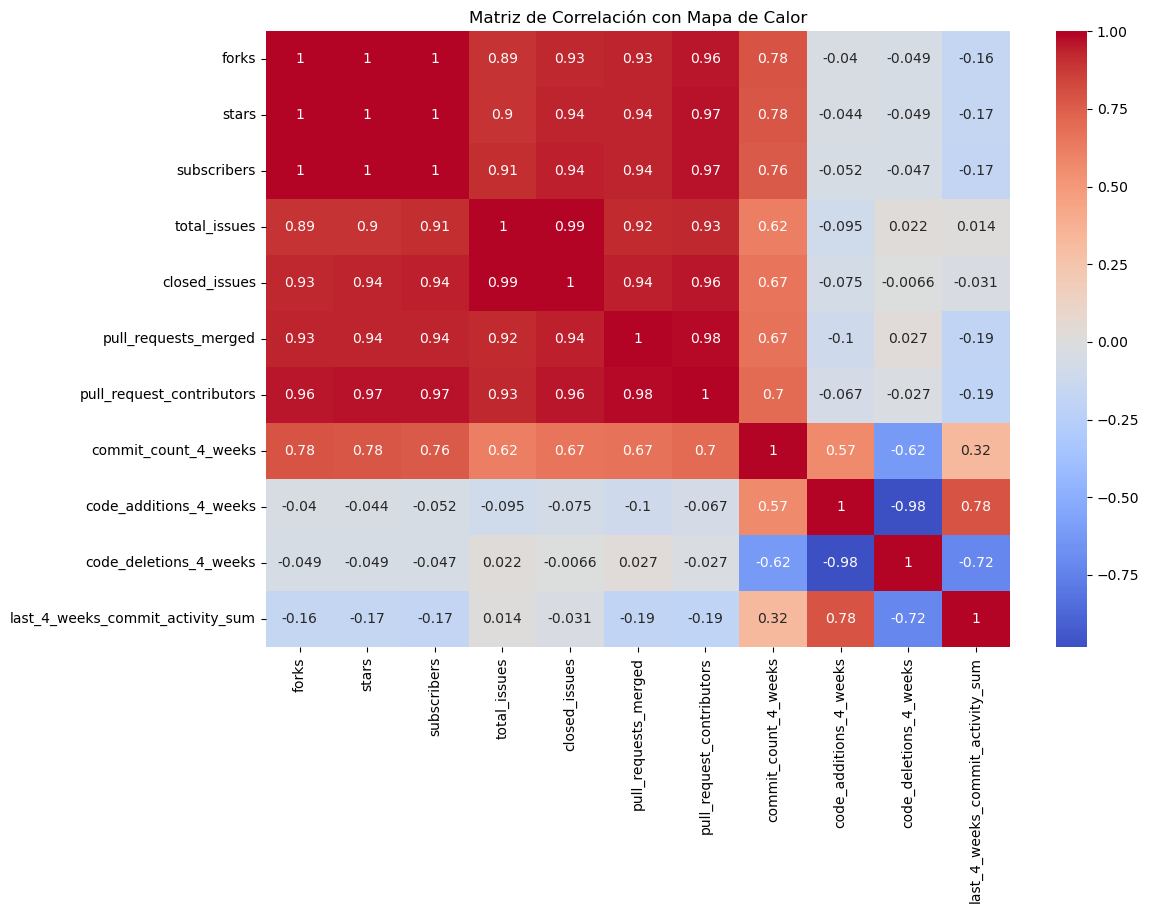

In [30]:
developers_corr = df_developers.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(developers_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Fuertes relaciones en muchas de las columnas. La popularidad y número de participantes en el desarrollo muestra una relación muy directa con la actividad de desarrollo. El número de deletions está expresado en negativo, por lo que muestra una relación opuesta a la adiciones; cuando en realidad la relación es prácticamente 1 a 1.

## 4. Llamamos el endpoint de Tickers
<hr>

https://api.coingecko.com/api/v3/coins/{}/tickers

Ya habíamos visto un preview de las keys y valores posibles en el endpoint Coins

In [31]:
tickers_dict = get_coins_tickers(crypto_ids)

La función retorna un diccionario con dataframes

In [32]:
for key in tickers_dict:
    print(f"{key}: {tickers_dict[key].shape[0]}")

df_bitcoin_ticker: 100
df_dash_ticker: 100
df_decred_ticker: 36
df_dero_ticker: 6
df_grin_ticker: 9
df_monero_ticker: 98
df_pirate_chain_ticker: 11
df_secret_ticker: 36
df_verge_ticker: 45
df_zcash_ticker: 100
df_zencash_ticker: 53


Éste es el número de filas, es decir, el número de mercados/brokers recopilados donde se opera la moneda.

Tomamos uno de los dataframes en el diccionario y lo observamos:

In [33]:
tickers_dict['df_dash_ticker'].head(10)

,base,target,market_name,market_identifier,market_has_trading_incentive,last,volume,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,DASH,USDT,MEXC,mxc,False,31.330,1344.729040,0.001069,0.017019,31.29,1.436851,22.886616,42079.0,green,0.063837,2023-08-15 17:54:48,2023-08-15 17:54:48,2023-08-15 17:54:48,False,False,https://www.mexc.com/exchange/DASH_USDT,None,dash,tether
1,DASH,USDT,DigiFinex,digifinex,False,31.310,3106.003000,0.001068,0.017006,31.27,3.316665,52.822000,97116.0,green,0.095755,2023-08-15 17:53:48,2023-08-15 17:53:48,2023-08-15 17:53:48,False,False,https://www.digifinex.com/en-ww/trade/USDT/DASH,None,dash,tether
2,DASH,USDT,Binance,binance,False,31.350,36092.498000,0.001069,0.017028,31.30,38.922589,619.909000,1139668.0,green,0.031918,2023-08-15 17:36:44,2023-08-15 17:36:44,2023-08-15 17:36:44,False,False,https://www.binance.com/en/trade/DASH_USDT?ref...,None,dash,tether
3,DASH,USDT,Bitrue,bitrue,False,31.310,123657.879000,0.001068,0.017009,31.27,132.045000,2103.000000,3867010.0,green,0.159490,2023-08-15 17:54:05,2023-08-15 17:54:05,2023-08-15 17:54:05,False,False,https://www.bitrue.com/trade/dash_usdt,None,dash,tether
4,DASH,USDT,XT.COM,xt,False,31.320,3613.821000,0.001068,0.017014,31.28,3.896415,62.063000,114109.0,green,0.063837,2023-08-15 17:54:44,2023-08-15 17:54:44,2023-08-15 17:54:44,False,False,https://www.xt.com/trade/dash_usdt,None,dash,tether
5,DSH,USD,Bitfinex,bitfinex,False,31.314,1456.064031,0.001069,0.017032,31.31,1.557145,24.799525,45595.0,green,0.095785,2023-08-15 17:51:29,2023-08-15 17:51:29,2023-08-15 17:53:22,False,False,https://trading.bitfinex.com/t/DSH:USD?type=ex...,None,dash,NaN
6,DASH,USDT,Azbit,azbit,False,31.320,5791.660000,0.001068,0.017014,31.28,6.253386,99.606000,183134.0,green,0.031918,2023-08-15 17:51:25,2023-08-15 17:51:25,2023-08-15 17:54:13,False,False,https://dashboard.azbit.com/exchange/DASH_USDT,None,dash,tether
7,DASH,USDT,PointPay,pointpay,False,31.330,3004.479904,0.001069,0.017016,31.29,3.240003,51.598000,94867.0,green,0.037916,2023-08-15 17:52:56,2023-08-15 17:52:56,2023-08-15 17:52:56,False,False,https://exchange.pointpay.io/trade-classic/DAS...,None,dash,tether
8,DASH,USDT,Tidex,tidex,False,31.330,3377.875996,0.001069,0.017017,31.29,3.609281,57.482000,105684.0,green,0.051910,2023-08-15 17:51:47,2023-08-15 17:51:47,2023-08-15 17:53:40,False,False,None,None,dash,tether
9,DASH,USDT,Toobit,toobit,False,31.320,5358.286000,0.001068,0.017012,31.28,5.782462,92.093000,169318.0,green,0.191449,2023-08-15 17:53:24,2023-08-15 17:53:24,2023-08-15 17:53:24,False,False,https://www.toobit.com/en-US/spot/DASH_USDT,None,dash,tether


El dato de último precio (columna last) es inconsistente a lo largo de la columna, ya que depende de la moneda en la columna target. Para observar con mayor consistencia, utilizamos las columnas que indican "converted", que están divididas en last y volume.

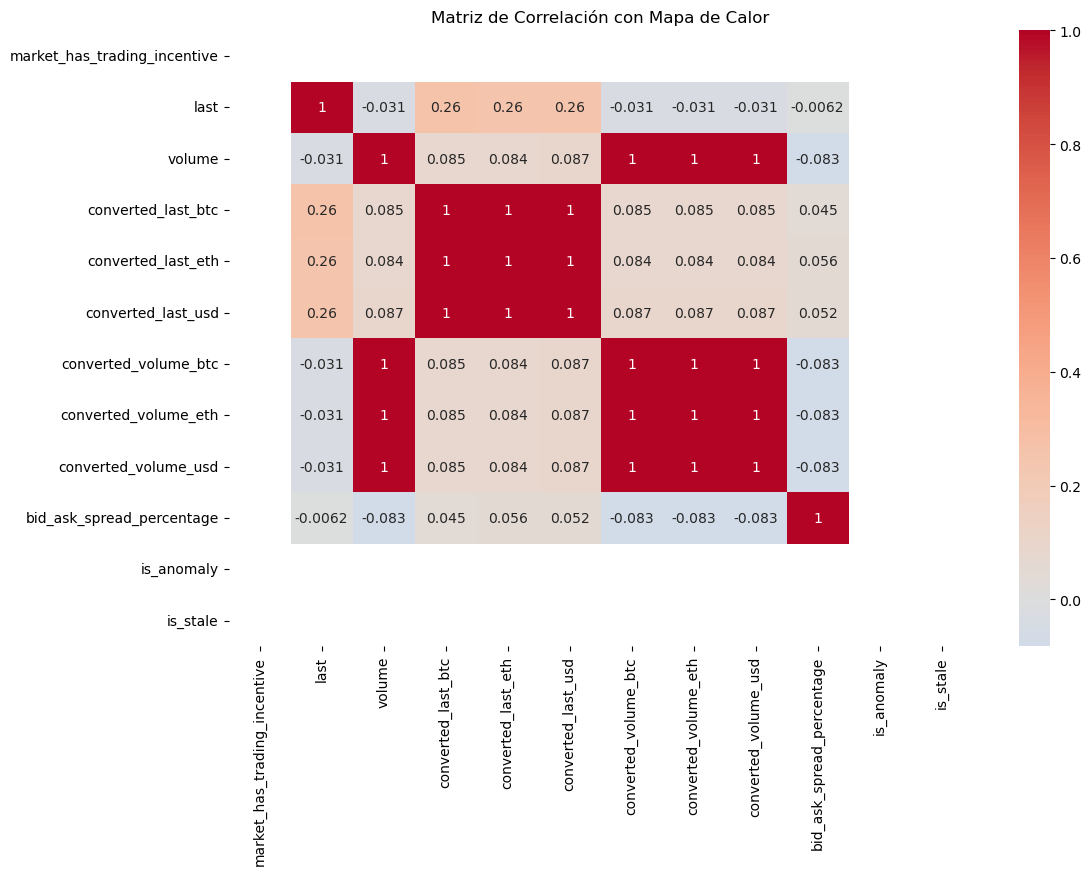

In [34]:
ticker_dash_corr = tickers_dict['df_dash_ticker'].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(ticker_dash_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Las columnas de la categía "converted_last" son cuasi equivalentes entre sí, al igual que las columnas del conjunto "converted_volume" entre sí y repecto a "volume"; lo cual tiene completa lógica ya que esa es su función (mostrar equivalencia con diferentes unidades)

Eset dataset tiene un dato categórico muy interesante, el trust_score de cada broker. Ploteamos nube de palabras:

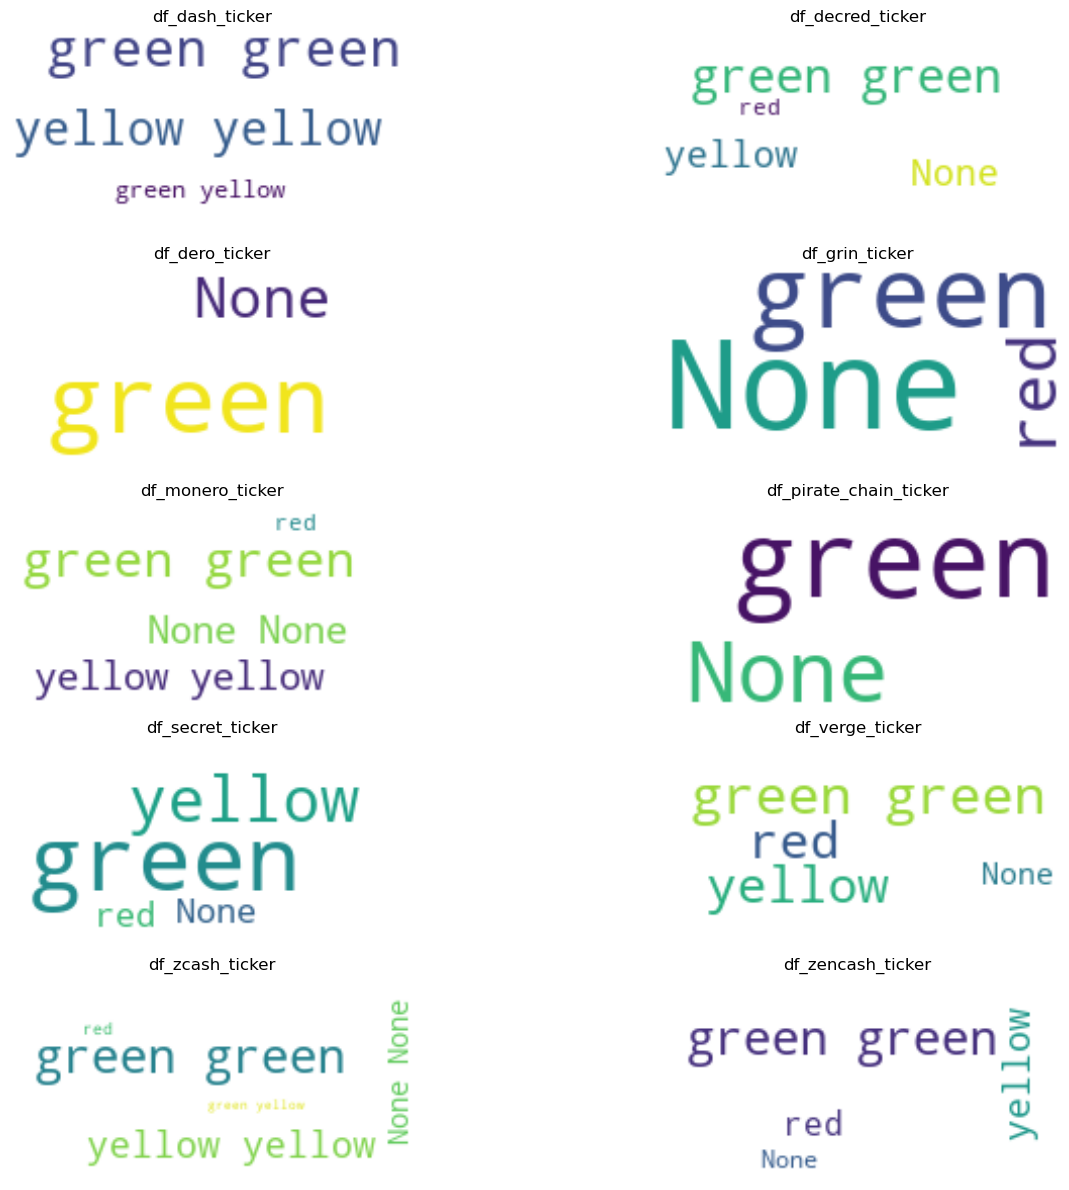

In [35]:
fig, axes = plt.subplots(5, 2, figsize=(17, 12))
fig.subplots_adjust(hspace=1)  

graphic_dict = tickers_dict.copy()
del graphic_dict['df_bitcoin_ticker']

for idx, (key, df) in enumerate(graphic_dict.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    text_data = ' '.join(df['trust_score'].astype(str))

    wordcloud = WordCloud(width=200, height=100, background_color='white').generate(text_data)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(key)
    ax.axis('off')

plt.tight_layout()
plt.show()

Observamos los valores únicos de cada dataset.

In [36]:
# Exploramos los posibles valores de la columna trusts scores
for key in tickers_dict:
    unique_trust_scores = tickers_dict[key]['trust_score'].unique()
    print(f"Puntajes únicos en el dataframe {key}: {unique_trust_scores}")

Puntajes únicos en el dataframe df_bitcoin_ticker: ['green']
Puntajes únicos en el dataframe df_dash_ticker: ['green' 'yellow']
Puntajes únicos en el dataframe df_decred_ticker: ['green' 'yellow' None 'red']
Puntajes únicos en el dataframe df_dero_ticker: ['green' None]
Puntajes únicos en el dataframe df_grin_ticker: ['green' 'red' None]
Puntajes únicos en el dataframe df_monero_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_pirate_chain_ticker: ['green' None]
Puntajes únicos en el dataframe df_secret_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_verge_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_zcash_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_zencash_ticker: ['green' 'yellow' 'red' None]


Con esto obtenemos una idea de como escalarlo, en caso de utilizarse para el dashboard.

### 5. Llamamos el endpoint Market Chart para el máximo de días posible
---

https://api.coingecko.com/api/v3/coins/dash/market_chart?vs_currency=USD&days=max

In [37]:
market_chart_dict = get_market_chart_max(crypto_ids)

In [38]:
for key in market_chart_dict:
    print(f"El número de registros en el dataframe {key} es {market_chart_dict[key].shape[0]}")

El número de registros en el dataframe df_bitcoin_max es 3761
El número de registros en el dataframe df_dash_max es 3468
El número de registros en el dataframe df_decred_max es 2745
El número de registros en el dataframe df_dero_max es 1968
El número de registros en el dataframe df_grin_max es 1673
El número de registros en el dataframe df_monero_max es 3373
El número de registros en el dataframe df_pirate_chain_max es 1649
El número de registros en el dataframe df_secret_max es 1050
El número de registros en el dataframe df_verge_max es 3204
El número de registros en el dataframe df_zcash_max es 2483
El número de registros en el dataframe df_zencash_max es 2255


Las monedas tienen diferente fecha de génesis, por lo cual el número de registros es completamente variable

In [39]:
market_chart_dict['df_monero_max'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3373 non-null   datetime64[ns]
 1   prices         3373 non-null   float64       
 2   market_caps    3371 non-null   float64       
 3   total_volumes  3373 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 105.5 KB


Consultamos el endpoint de history para ver si podemos solucionar los NaNs


In [40]:
# Separamos los registros y formateamos para la llamada el endpoint
filtered_rows = market_chart_dict['df_monero_max'][market_chart_dict['df_monero_max']['market_caps'].isna()]
dates = filtered_rows['date'].tolist()
formatted_dates = [date.strftime('%d-%m-%Y') for date in dates]
formatted_dates

['05-06-2014', '02-04-2017']

In [41]:
retrieved = []

# Llamamos el endpoint
for date in formatted_dates:
    retrieved.append(get_coin_history('monero', date))

retrieved

[{'prices': 1.842686581, 'market_caps': None, 'total_volumes': 0.0},
 {'prices': 20.18990408355015,
  'market_caps': None,
  'total_volumes': 5843973.157247414}]

Con este método tampoco puede recuperarse el dato. CoinMarketsCap no ofrece dato similar en su plan gratuito.

In [42]:
for df_name, df in market_chart_dict.items():
    na_rows_count = df.isna().any(axis=1).sum()
    print(f"El dataframe {df_name} tiene {na_rows_count} filas con uno o más NA/NaN, {round((na_rows_count / len(df)) * 100, 2)}% del dataset")

El dataframe df_bitcoin_max tiene 1 filas con uno o más NA/NaN, 0.03% del dataset
El dataframe df_dash_max tiene 1 filas con uno o más NA/NaN, 0.03% del dataset
El dataframe df_decred_max tiene 1 filas con uno o más NA/NaN, 0.04% del dataset
El dataframe df_dero_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_grin_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_monero_max tiene 2 filas con uno o más NA/NaN, 0.06% del dataset
El dataframe df_pirate_chain_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_secret_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_verge_max tiene 1 filas con uno o más NA/NaN, 0.03% del dataset
El dataframe df_zcash_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_zencash_max tiene 0 filas con uno o más NA/NaN, 0.0% del dataset


El problema no parece ser grave (ausencia de datos en 0% a 0.06%, según el dataset); podemos trabajar con los datos

Observamos el dataset de ejemplo

In [43]:
market_chart_dict['df_monero_max'].describe()

,prices,market_caps,total_volumes
count,3373.000000,3.371000e+03,3.373000e+03
mean,98.791055,1.707313e+09,1.269992e+08
std,94.988125,1.653586e+09,1.845582e+08
min,0.216177,5.150394e+05,0.000000e+00
25%,6.251826,8.249312e+07,1.655122e+06
50%,78.167820,1.329431e+09,7.453314e+07
75%,155.725828,2.786326e+09,1.656457e+08
max,542.325486,8.612081e+09,1.948295e+09


Presenta la misma variabilidad de datos que otros datasets vistos anteriormente (volatilidad de cotizaciones de la moneda)

## 6. Datos de Open, High, Low, Close para la Moneda consultada
---

https://api.coingecko.com/api/v3/coins/{}/ohlc?vs_currency=USD&days={}

Llamamos al enpoint con la lista de monedas, sin especificar cantidad de días (retornará el máximo por moneda)

In [44]:
ohlc_dictionary = get_OHLC(crypto_ids)

In [45]:
for df in ohlc_dictionary:
    print(f" El dataframe {df} tiene {ohlc_dictionary[df].shape[0]} filas")

 El dataframe df_bitcoin_ohlc tiene 981 filas
 El dataframe df_dash_ohlc tiene 905 filas
 El dataframe df_decred_ohlc tiene 716 filas
 El dataframe df_dero_ohlc tiene 513 filas
 El dataframe df_grin_ohlc tiene 436 filas
 El dataframe df_monero_ohlc tiene 880 filas
 El dataframe df_pirate_chain_ohlc tiene 430 filas
 El dataframe df_secret_ohlc tiene 273 filas
 El dataframe df_verge_ohlc tiene 836 filas
 El dataframe df_zcash_ohlc tiene 647 filas
 El dataframe df_zencash_ohlc tiene 588 filas


Exploramos Grin como ejemplo:

In [46]:
ohlc_dictionary['df_grin_ohlc'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    436 non-null    datetime64[ns]
 1   open    436 non-null    float64       
 2   high    436 non-null    float64       
 3   low     436 non-null    float64       
 4   close   436 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2 KB


In [47]:
ohlc_dictionary['df_grin_ohlc'].head()

,date,open,high,low,close
0,2019-01-19,25.09,25.09,6.74,6.74
1,2019-01-23,3.34,4.72,2.54,4.58
2,2019-01-27,4.00,8.95,4.00,8.95
3,2019-01-31,13.70,13.70,6.86,6.86
4,2019-02-03,5.52,6.31,5.52,6.11


In [48]:
ohlc_dictionary['df_grin_ohlc'].tail()

,date,open,high,low,close
431,2023-07-31,0.030669,0.031463,0.030669,0.031463
432,2023-08-03,0.030752,0.032070,0.030494,0.032070
433,2023-08-07,0.029703,0.030332,0.028273,0.028273
434,2023-08-11,0.028465,0.038851,0.028465,0.037427
435,2023-08-15,0.031990,0.041565,0.031990,0.038379


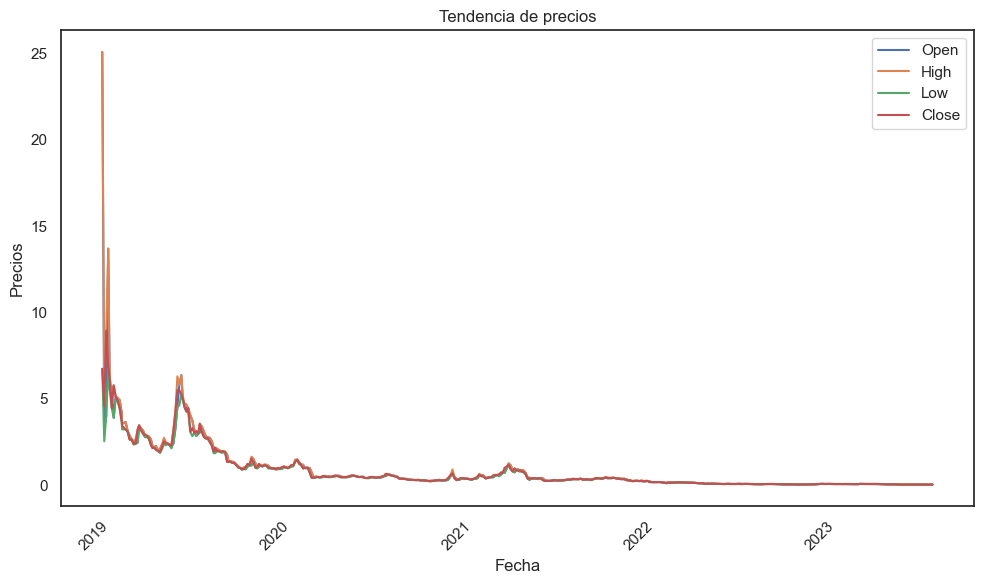

In [49]:
sns.set(style='white')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='open', label='Open')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='high', label='High')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='low', label='Low')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='close', label='Close')

plt.title('Tendencia de precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


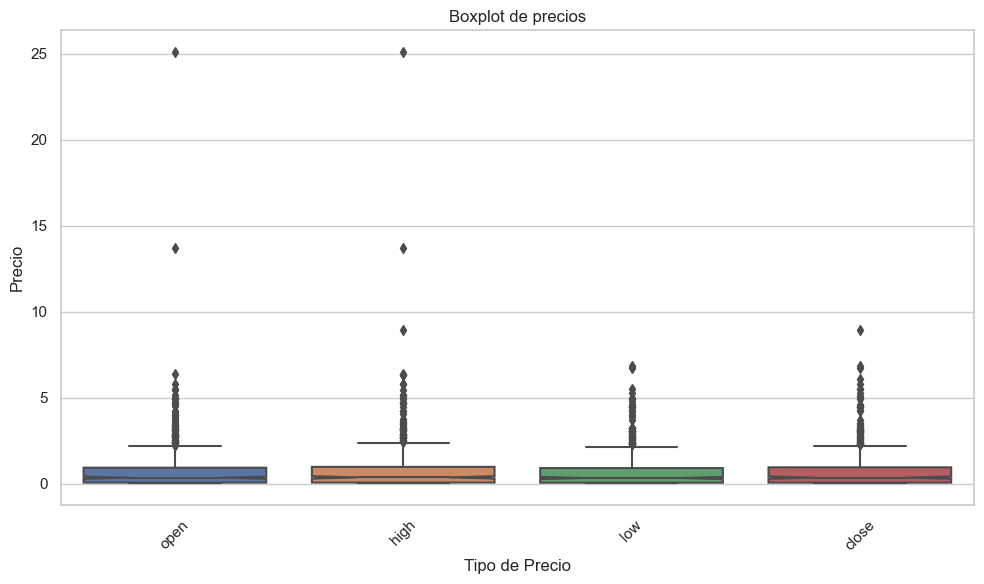

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(data=ohlc_dictionary['df_grin_ohlc'][['open', 'high', 'low', 'close']], notch=True)

plt.title('Boxplot de precios')
plt.xlabel('Tipo de Precio')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Esta es una de las monedas que habíamos notado con grandes diferencias entre los mínimos y máximos históricos. Es una de las más modernas, por lo que el valor de apertura en su primer día de cotización parace haber sido demasiado optimista para lo que luego fue la moneda. La superposición en la línea de tendencia nos habla de uniformidad a lo largo de cada día, para la mayoría de los mismos.

Los registros tienen 4 días de distancia (propio de la versión gratuita de CoinGecko)

In [51]:
for df_name, df in ohlc_dictionary.items():
    na_rows_count = df.isna().any(axis=1).sum()
    print(f"El dataframe {df_name} tiene {na_rows_count} filas con uno o más NA/NaN, {round((na_rows_count / len(df)) * 100, 2)}% del dataset")

El dataframe df_bitcoin_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_dash_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_decred_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_dero_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_grin_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_monero_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_pirate_chain_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_secret_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_verge_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_zcash_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset
El dataframe df_zencash_ohlc tiene 0 filas con uno o más NA/NaN, 0.0% del dataset


Todos los datos están completos